In [1]:
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.parser import parse
from matplotlib import ticker
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools
from cmocean import cm
from glob import glob

%matplotlib inline

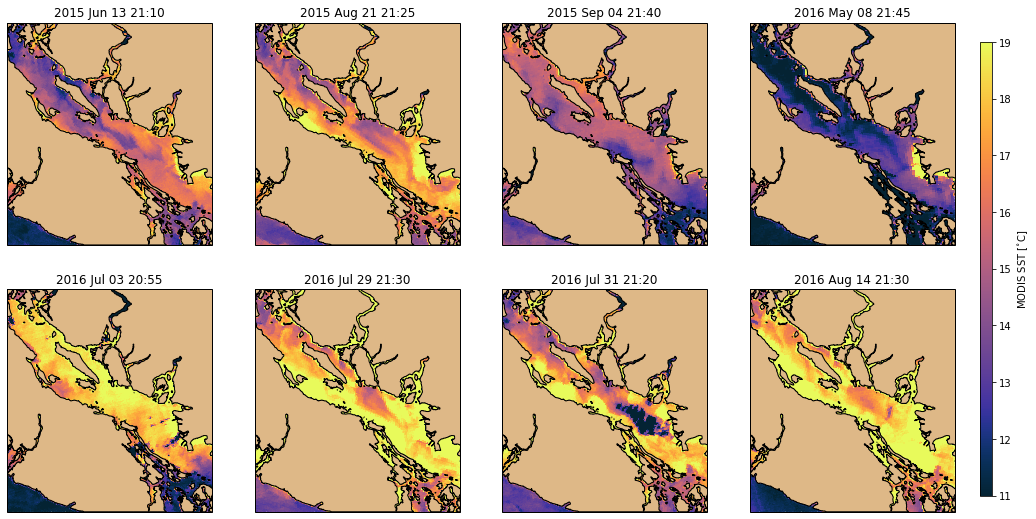

In [3]:
path = '/ocean/bmoorema/research/MEOPAR/analysis-ben/data/MODIS/'

dates = [
    '2015 Jun 13 21:10',
    '2015 Aug 21 21:25',
    '2015 Sep 04 21:40',
    '2016 May 08 21:45',
    '2016 Jul 03 20:55',
    '2016 Jul 29 21:30',
    '2016 Jul 31 21:20',
    '2016 Aug 14 21:30',
]

xlim, ylim = [-125.2, -122.8], [48.5, 50.2]
fig, axs = plt.subplots(2, 4, figsize=(17, 9), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
axs = axs.reshape(8)
cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])

for ax, date in zip(axs, dates):
    
    # Plot map
    ax.set_extent(xlim + ylim)
    ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))
    ax.set_title(date)
    
    with nc.Dataset(path + parse(date).strftime('A%Y%j%H%M%S.L2_LAC_SST.nc')) as ds:

        # Extract fields
        lon = np.array(ds.groups['navigation_data'].variables['longitude'])
        lat = np.array(ds.groups['navigation_data'].variables['latitude'])
        sst = np.array(ds.groups['geophysical_data'].variables['sst'])

    # Plot data
    c = ax.pcolormesh(lon, lat, sst, vmin=11, vmax=19, cmap=cm.thermal, transform=crs.PlateCarree())

fig.colorbar(c, cax=cax, label='MODIS SST [$^{\circ}$C]')